In [1]:
from utils_v1 import *


In [2]:
from icecream import ic

import numpy as np
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential

from src.trainer.evidential import TrainerEvidential, TrainerEvidentialUEO
import src.trainer.evidential as evidential

from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2
from src import metrics as _metric


In [3]:
from enum import Enum
UncertaintyMethod = Enum('Predictor', 'pred_var MI pred_entropy KL pred_entropy_single evidential')
uncertaintyMethod = "evidential"


In [4]:

config = {
	"training": False,
	"learning_rate": 1e-5, # 1e-3
	"weights": [0.1, 0.9, 0],
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 1,
	"Uncertainty": {
		"annealing_step": 10*375 # 1875, 10*375*10
	},
	"uncertainty_method": uncertaintyMethod,
	"evidence_function": evidential.relu_evidence,
#	"loss": evidential.loss_evidential_dice
}

# config["loss"] = config["loss"](config["weights"])
'''
if config["training"] == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if config["training"] == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''
dates = [2018, 2019]
# dates = [2017, 2018]

dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
	addPastDeforestationInput = config['addPastDeforestationInput'],
	borderBuffer = 2)	
# dates = [2019, 2020]
# dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
# 	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	
# dataset = MTDeforestationTime()	
# [2016, 2017, 2018]

ic(dates)


if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerEvidential(
		dataset)
else:
	patchesHandler = PatchesHandler()

# exp = 170
# exp = 155
exp = 155 # relu
# exp = 171 # softsign
## exp = 173
exp = 191
exp = 192
exp = 193

# if config["training"] == True:
# trainer = TrainerEvidentialUEO(config, dataset, patchesHandler)
trainer = TrainerEvidential(config, dataset, patchesHandler)

trainer.defineExperiment(exp)


ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| dates: [2018, 2019]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [5]:
exp

193

In [6]:
trainer.setExperimentPath()
trainer.createLogFolders()

In [7]:
# ic(type(dataset), exp, dataset.dates)


In [8]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


In [9]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [10]:

trainer.label_mask.dtype

dtype('uint8')

In [11]:

trainer.getLabelCurrentDeforestation()

In [12]:

trainer.loadInputImage()

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [13]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

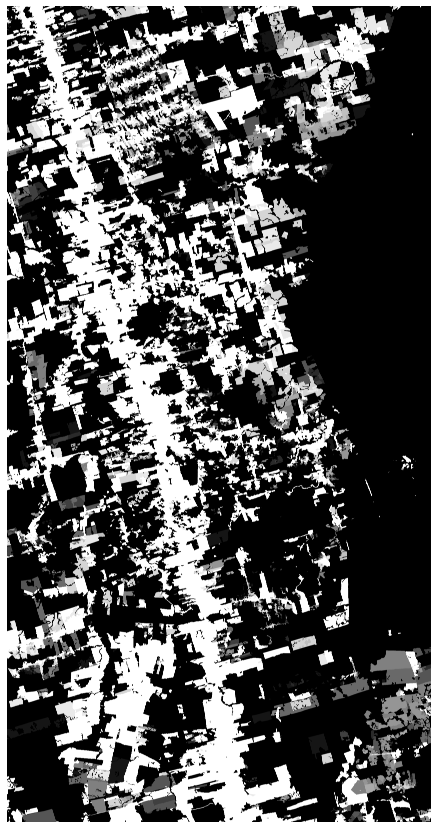

In [14]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [15]:

trainer.getImageChannels()

ic| self.image_stack.shape: (17730, 9200, 21)
ic| self.channels: 21


In [16]:

trainer.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [17]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


In [18]:
if config["training"] == True:
    trainer.extractCoords()

In [19]:
if config["training"] == True:
    trainer.trainTestSplit()

In [20]:
if config["training"] == True:
    trainer.label_mask.shape

In [21]:
if config["training"] == True:
    if type(dataset) != PADeforestationTime and type(dataset) != MTDeforestationTime:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)

    else:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)



In [22]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [23]:
if config["training"] == True:
    print(trainer.coords_train)

In [24]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

In [25]:
if config["training"] == True:
    inputSnipShow = True

In [26]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


In [27]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


In [28]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

In [29]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [30]:
if config["training"] == True:
    trainer.getGenerators()


In [31]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [32]:
if config["training"] == True:
    print(trainer.path_exp)

In [33]:
if config["training"] == True:
    print(trainer.channels)

In [34]:
if config["training"] == True:
    print(trainer.image_stack.shape)

In [35]:
# trainer.weights = [0.01, 0.99, 0]
trainer.weights

[0.1, 0.9, 0]

### Evidential metrics

In [36]:
if config["training"] == True:
    trainer.train()

In [37]:
if config["training"] == True:
    trainer.plotHistory()


In [38]:
if config["training"] == True:
    trainer.plotLossTerms()

In [39]:
if config["training"] == True:
    trainer.plotAnnealingCoef()

In [40]:
def draw_EDL_results(K, history):
    # train_acc1, train_ev_s, train_ev_f, test_acc1, test_ev_s, test_ev_f 
    # calculate uncertainty for training and testing data for correctly and misclassified samples
    '''
    K: known classes
    '''
    train_u_succ = K / (K+np.array(history['evidential_success']))
    train_u_fail = K / (K+np.array(history['evidential_fail']))
    test_u_succ  = K / (K+np.array(history['val_evidential_success']))
    test_u_fail  = K / (K+np.array(history['val_evidential_fail']))
    
    f, axs = plt.subplots(2, 2)
    f.set_size_inches([10,10])
    
    axs[0,0].plot(history['evidential_success'],c='r',marker='+')
    axs[0,0].plot(history['evidential_fail'],c='k',marker='x')
    axs[0,0].set_title('Train Data')
    axs[0,0].set_xlabel('Epoch')
    axs[0,0].set_ylabel('Estimated total evidence for classification') 
    axs[0,0].legend(['Correct Clasifications','Misclasifications'])
    
    axs[0,1].plot(train_u_succ,c='r',marker='+')
    axs[0,1].plot(train_u_fail,c='k',marker='x')
    axs[0,1].plot(history['acc'],c='blue',marker='*')
    axs[0,1].set_title('Train Data')
    axs[0,1].set_xlabel('Epoch')
    axs[0,1].set_ylabel('Estimated uncertainty for classification')
    axs[0,1].legend(['Correct clasifications','Misclasifications', 'Accuracy'])
    
    axs[1,0].plot(history['val_evidential_success'],c='r',marker='+')
    axs[1,0].plot(history['val_evidential_fail'],c='k',marker='x')
    axs[1,0].set_title('Test Data')
    axs[1,0].set_xlabel('Epoch')
    axs[1,0].set_ylabel('Estimated total evidence for classification') 
    axs[1,0].legend(['Correct Clasifications','Misclasifications'])
    
    axs[1,1].plot(test_u_succ,c='r',marker='+')
    axs[1,1].plot(test_u_fail,c='k',marker='x')
    axs[1,1].plot(history['val_acc'],c='blue',marker='*')
    axs[1,1].set_title('Test Data')
    axs[1,1].set_xlabel('Epoch')
    axs[1,1].set_ylabel('Estimated uncertainty for classification')
    axs[1,1].legend(['Correct clasifications','Misclasifications', 'Accuracy'])
    

In [41]:
if config["training"] == True:
    draw_EDL_results(trainer.class_n, trainer.history.history)

    plt.figure(5)
    plt.plot(trainer.history.history['evidential_success'],c='r',marker='+')
    plt.plot(trainer.history.history['evidential_fail'],c='k',marker='x')
    plt.title('Train Data')
    plt.xlabel('Epoch')
    plt.ylabel('Estimated total evidence for classification') 
    plt.legend(['Correct Clasifications','Misclasifications'])


In [42]:
trainer.image_stack.shape

(17730, 9200, 21)

In [43]:
if type(trainer.dataset) != PADeforestationTime and type(trainer.dataset) != MTDeforestationTime:
    trainer.patchesHandler.dataset.image_channels[-1]

In [44]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]

In [45]:
trainer.image_stack.shape

(17730, 9200, 21)

In [46]:
trainer.setPadding()

-30.0 -16.0


In [47]:
trainer.infer()

ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp193/models/resunet_0.h5'


time:  0


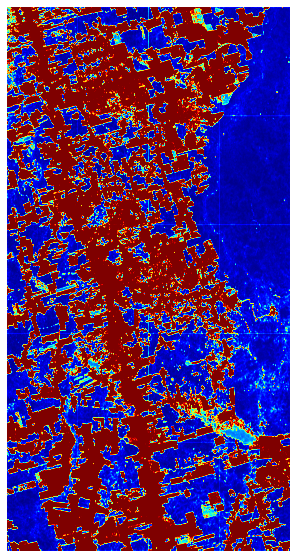

In [48]:
trainer.logger.plotFigure(trainer.u_reconstructed, 
            name='Uncertainty', cmap='jet', savefig=False, figsize=(10,10))

In [49]:
trainer.loadPredictedProbabilities()


In [50]:
trainer.prob_rec.shape

(17760, 9216)

In [51]:
trainer.getMeanProb()

In [52]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 0.028098416
    np.mean(value): 0.19998936
    np.max(value): 0.85342526


In [53]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (17760, 9216)


(17760, 9216)

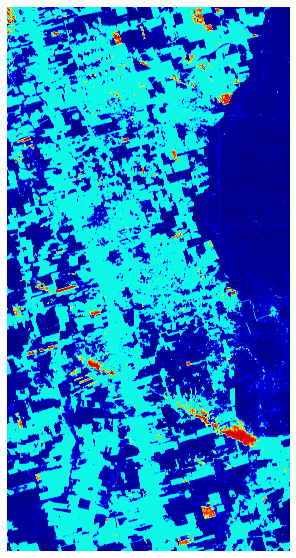

In [54]:
trainer.unpadMeanProb()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

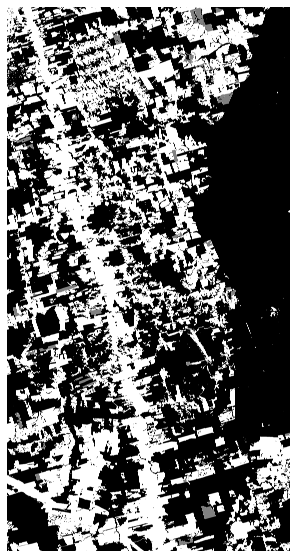

In [55]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [56]:
trainer.squeezeLabel()

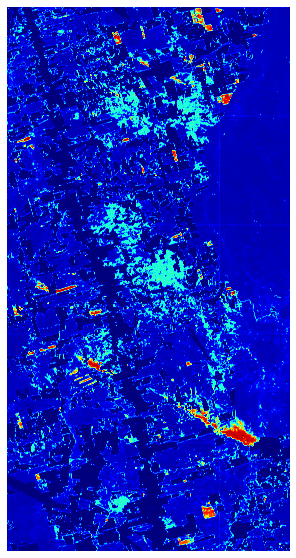

In [57]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [58]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 0.0
    np.mean(value): 0.07749107
    np.max(value): 0.8407054


In [59]:
print(trainer.label_mask.shape)

(17730, 9200)


In [60]:
trainer.getLabelTest()

(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))


In [61]:
trainer.getMAP()

36.43


In [62]:
trainer.prob_rec.shape

(17760, 9216)

In [63]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(17760, 9216, 1)


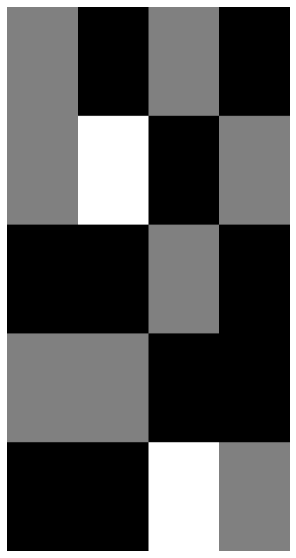

In [64]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [65]:
trainer.getLabelCurrentDeforestation()

In [66]:
trainer.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([160732712,   2383288], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [67]:
trainer.getTestValues()

ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)


In [68]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([160732712,   2383288], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([160925532,   2190468], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162923180,    192820], dtype=int64))


In [69]:
trainer.calculateMetrics()

ic| self.f1: 51.63, self.precision: 41.58, self.recall: 68.08


In [70]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9430481,)
ic| f1_val: 83.94
    precision_val: 87.63
    recall_val: 80.55
    mAP_val: 83.7


In [71]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [72]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([161515456,   1600544], dtype=int64))


In [73]:
'''

import types

trainer.getErrorMaskToShowRGB = types.MethodType(getErrorMaskToShowRGB, trainer)
'''


'\n\nimport types\n\ntrainer.getErrorMaskToShowRGB = types.MethodType(getErrorMaskToShowRGB, trainer)\n'

In [74]:
trainer.getErrorMaskToShowRGB()

[0. 1.]


In [75]:
predicted_unpad_to_show = trainer.predicted_unpad.copy()

predicted_unpad_to_show[trainer.label_mask == 2] = 0
print(np.unique(predicted_unpad_to_show))

[0. 1.]


In [76]:
predicted_unpad_to_show.shape

(17730, 9200)

In [77]:

'''
trainer.logger.plotFigure = types.MethodType(trainer.logger.plotFigure, trainer)
'''

'\ntrainer.logger.plotFigure = types.MethodType(trainer.logger.plotFigure, trainer)\n'

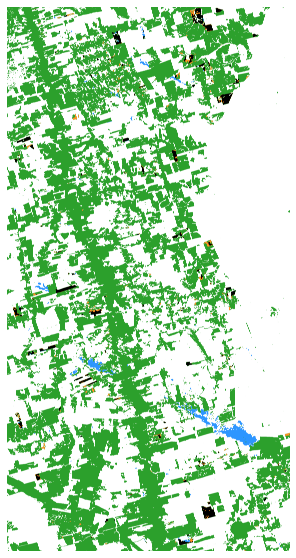

In [78]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [79]:
trainer.setUncertainty()

In [80]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54134079,)


In [81]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0, np.mean(value): 0.20618302, np.max(value): 1.0


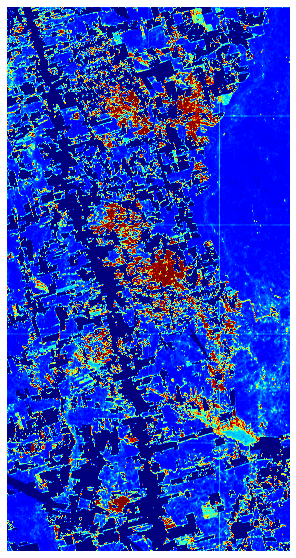

In [82]:
trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty evidential learning.png', figsize=(10,10), cmap='jet', savefig=True)

ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


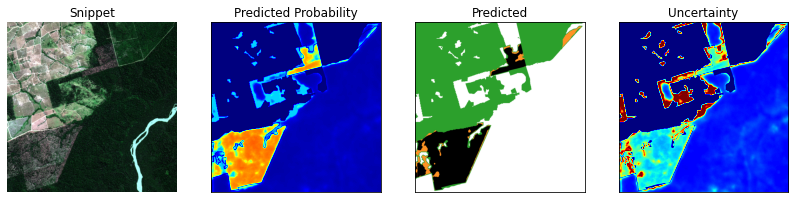

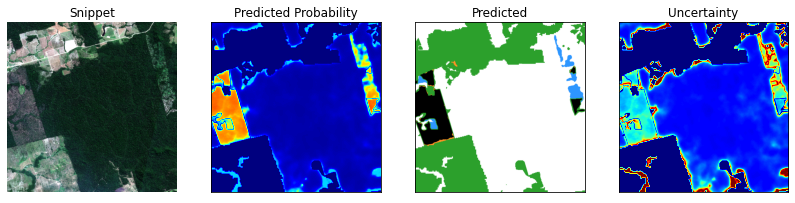

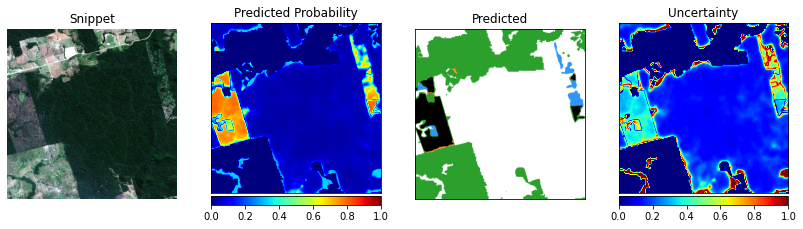

In [83]:
trainer.logger.plotCropSample(trainer)

In [84]:
trainer.logger.getStats(trainer.uncertainty)

ic| np.min(value): 0.08455614
    np.mean(value): 0.3074809
    np.max(value): 1.0


In [85]:
get_other_uncertainty_metrics = True
if get_other_uncertainty_metrics == True:
    trainer.getOtherUncertaintyMetrics()
    print(trainer.sUEO)

    print(trainer.ece_score)  

(54134079,) (54134079,)
0.11005630205249833
0.20675021170477956
0.11005630205249833
0.20675021170477956


In [86]:
trainer.getUncertaintyMetrics()

(array([0, 1], dtype=int8), array([48287039,  5847040], dtype=int64))
0.08455614 0.22362491 0.99999976
1.0 1.0 1.0
(48287039,) (48287039,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5847040,)
    predicted_test_classified_incorrect.shape: (5847040,)


cm_correct [[46968792   707211]
 [  107600   503436]]


d:\Jorge\deforestation_uncertainty\src\trainer\evidential.py:609: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 5847040
    len(self.label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 5847040
    len(self.label_mask_current_deforestation_test): 54134079


cm_incorrect [[5718605       0]
 [ 128435       0]]


In [87]:
trainer.m

{'precision_L': 0.4158404555580611,
 'recall_L': 0.8239056291282346,
 'recall_Ltotal': 0.6808056029242526,
 'AA': 0.10801033485764115,
 'precision_H': nan,
 'recall_H': 0.0,
 'f1_L': 0.5527152638521631,
 'f1_H': nan}

In [88]:
print(trainer.uncertainty.shape, trainer.predicted_test.shape)
print(trainer.uncertainty.dtype, trainer.predicted_test.dtype)
print(np.unique(trainer.predicted_test))
print(trainer.label_mask_current_deforestation_test.shape)


(54134079,) (54134079,)
float32 float32
[0. 1.]
(54134079,)


In [89]:
trainer.mean_prob[trainer.mask_amazon_ts == 1].shape

(81558000,)

In [90]:
uncertainty_test_correct = trainer.uncertainty[trainer.predicted_test == trainer.label_mask_current_deforestation_test]
uncertainty_test_incorrect = trainer.uncertainty[trainer.predicted_test != trainer.label_mask_current_deforestation_test]

predicted_test_correct = trainer.uncertainty[trainer.predicted_test == trainer.label_mask_current_deforestation_test]
uncertainty_test_incorrect = trainer.uncertainty[trainer.predicted_test != trainer.label_mask_current_deforestation_test]


In [91]:
print(np.min(uncertainty_test_correct), np.mean(uncertainty_test_correct), np.max(uncertainty_test_correct))
print(np.min(uncertainty_test_incorrect), np.mean(uncertainty_test_incorrect), np.max(uncertainty_test_incorrect))


0.08455614 0.3028998 1.0
0.1258963 0.56580734 1.0


In [92]:
trainer.alpha_reconstructed.shape

(17760, 9216, 3)

In [93]:
trainer.alpha_unpad = trainer.alpha_reconstructed[:trainer.label_mask.shape[0], :trainer.label_mask.shape[1]]

In [94]:
trainer.alpha_unpad.shape

(17730, 9200, 3)

In [95]:
print(np.min(trainer.alpha_unpad), np.mean(trainer.alpha_unpad), np.max(trainer.alpha_unpad))

1.0 3.7863479 33.589195


In [96]:
trainer.predicted_unpad.shape

(17730, 9200)

In [97]:
trainer.label_mask.shape

(17730, 9200)

In [98]:
'''
fig = plt.figure(figsize=(20,20))


plt.imshow(trainer.alpha_unpad.astype(np.uint8))
plt.plot(6600, 16500, marker='v', color="white")
plt.plot(5600, 16500, marker='v', color="white")
plt.plot(4600, 16500, marker='v', color="white")
'''

'\nfig = plt.figure(figsize=(20,20))\n\n\nplt.imshow(trainer.alpha_unpad.astype(np.uint8))\nplt.plot(6600, 16500, marker=\'v\', color="white")\nplt.plot(5600, 16500, marker=\'v\', color="white")\nplt.plot(4600, 16500, marker=\'v\', color="white")\n'

Reference 0
Predicted 0.0
Evidence [15.272518  0.        0.      ]
Alpha [16.272518  1.        1.      ]
trimesh.x [0.         1.         0.5        ... 0.50390625 0.50195312 0.49804688]
trimesh.y [0.         0.         0.8660254  ... 0.28416459 0.29431332 0.2875475 ]
xy2bc(xy) [1. 0. 0.]
pvals [280.6384109109904, 2.2842192695954816e-59, 2.2842192695954816e-59, 0.0071010790595534565, 2.2842192695954816e-59, 0.0071010790595534565, 3.472812205988312, 2.2842192695954816e-59, 1.7940654101058692e-07, 1.7940654101058785e-07, 1.7940654101058724e-07, 3.472812205988312, 1.7940654101058724e-07, 2.2842192695954816e-59, 0.00710107905955348, 36.570202024175494, 0.21447875560529037, 0.21447875560529037, 2.2842192695954816e-59, 8.773951398520124e-05, 4.532650134922967e-12, 4.5326501349229444e-12, 2.2842192695954816e-59, 1.7940654101058724e-07, 8.773951398520083e-05, 4.532650134922967e-12, 0.0071010790595534565, 1.7940654101058724e-07, 0.21447875560529092, 1.7940654101058724e-07, 4.532650134922967e-12

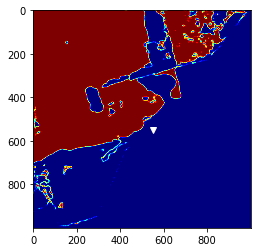

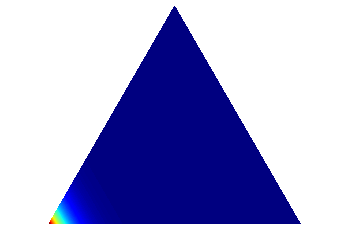

In [99]:
lims = dataset.previewLims1
# im = trainer.alpha_unpad[lims[0]:lims[1], lims[2]:lims[3]]
im = trainer.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]

plt.imshow(im.astype(np.uint8), cmap='jet')

row, col = (550, 550) # high evidence in class 0
# row, col = (200, 600) # class 1 is higher but it has high uncertainty
# row, col = (800, 200) # high evidence in class 1
# row, col = (200, 605) # alpha 1, 1, 1


plt.plot(col, row, marker='v', color="white")

plt.figure()
print("Reference",trainer.label_mask[lims[0]:lims[1], lims[2]:lims[3]][row, col])
print("Predicted",trainer.predicted_unpad[lims[0]:lims[1], lims[2]:lims[3]][row, col])
print("Evidence", trainer.alpha_unpad[lims[0]:lims[1], lims[2]:lims[3]][row, col] - 1)
print("Alpha", trainer.alpha_unpad[lims[0]:lims[1], lims[2]:lims[3]][row, col])

trainer.getMassFcn(trainer.alpha_unpad[lims[0]:lims[1], lims[2]:lims[3]][row, col])


[0.0, 1.265258934974491e-34, 5.008013463416619e-30, 2.4491897833623966e-27, 1.9822186713321064e-25, 5.98703084981027e-24, 9.694122736851963e-23, 1.0208327024493979e-21, 7.845807303994362e-21, 4.740950985695029e-20, 2.3697229296661685e-19, 1.0159401091226067e-18, 3.837024646907281e-18, 1.3028652115536558e-17, 4.040551523839368e-17, 1.1589228405904484e-16, 3.105444073435322e-16, 7.838498996385355e-16, 1.8765128393452266e-15, 4.285159611927428e-15, 9.37958548111301e-15, 1.9760485037884357e-14, 4.021186180845694e-14, 7.928527094405459e-14, 1.5187303215179804e-13, 2.832980460027532e-13, 5.156862631133599e-13, 9.177163975388372e-13, 1.59928816716272e-12, 2.7332502088174933e-12, 4.5871252344525105e-12, 7.56881625275559e-12, 1.2291638730822308e-11, 1.96657780237002e-11, 3.102551376779405e-11, 4.8304396144674977e-11, 7.427413712675742e-11, 1.1286745151832427e-10, 1.6961063412568869e-10, 2.5219850870287177e-10, 3.712527852777267e-10, 5.413151094481164e-10, 7.821385202497122e-10, 1.12035604343024

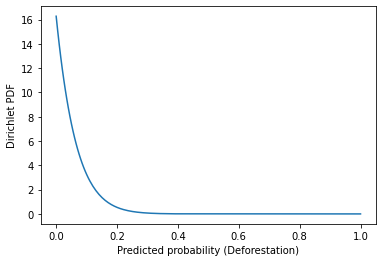

In [100]:
trainer.getMassFcn2D(trainer.alpha_unpad[lims[0]:lims[1], lims[2]:lims[3]][row, col][:2])


In [101]:
# trainer.getMassFcn(trainer.alpha_reconstructed[2500,7300])
# trainer.getMassFcn(trainer.alpha_unpad[16500,6600])


In [102]:
trainer.m

{'precision_L': 0.4158404555580611,
 'recall_L': 0.8239056291282346,
 'recall_Ltotal': 0.6808056029242526,
 'AA': 0.10801033485764115,
 'precision_H': nan,
 'recall_H': 0.0,
 'f1_L': 0.5527152638521631,
 'f1_H': nan}

In [103]:
trainer.getUncertaintyAAValues()

[0.13, 0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]


ic| self.uncertainty.shape: (54134079,)
    self.label_mask_current_deforestation_test.shape: (54134079,)


threshold 0.13
(13139077,) (13139077,)


ic| label_current_deforestation_test_classified_incorrect.shape: (40995002,)
    predicted_test_classified_incorrect.shape: (40995002,)


cm_correct [[13139029        0]
 [      48        0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:292: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| TP_H + FN_H + FP_H + TN_H: 40995002
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 40995002
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[39548368   707211]
 [  235987   503436]]
[       nan 0.         0.         0.7572864  0.41584046 0.6808498
 0.02300761]
threshold 0.15
(23547752,) (23547752,)


ic| label_current_deforestation_test_classified_incorrect.shape: (30586327,)
    predicted_test_classified_incorrect.shape: (30586327,)


cm_correct [[23547143        0]
 [     609        0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:292: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| TP_H + FN_H + FP_H + TN_H: 30586327
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 30586327
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[29140254   707211]
 [  235426   503436]]
[       nan 0.         0.         0.56501057 0.41584046 0.68136675
 0.03081829]
threshold 0.2
(34794711,) (34794711,)


ic| label_current_deforestation_test_classified_incorrect.shape: (19339368,)
    predicted_test_classified_incorrect.shape: (19339368,)


cm_correct [[34792225        0]
 [    2486        0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:292: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| TP_H + FN_H + FP_H + TN_H: 19339368
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 19339368
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[17895172   707211]
 [  233549   503436]]
[       nan 0.         0.         0.35724941 0.41584046 0.6831021
 0.04863856]
threshold 0.225
(37218224,) (37218224,)


ic| label_current_deforestation_test_classified_incorrect.shape: (16915855,)
    predicted_test_classified_incorrect.shape: (16915855,)


cm_correct [[37214436        0]
 [    3788        0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:292: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_L = TP_L / (TP_L + FP_L)
ic| TP_H + FN_H + FP_H + TN_H: 16915855
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 16915855
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[15472961   707211]
 [  232247   503436]]
[       nan 0.         0.         0.3124807  0.41584046 0.68431104
 0.05552469]
threshold 0.25
(38775204,) (38775204,)


ic| label_current_deforestation_test_classified_incorrect.shape: (15358875,)
    predicted_test_classified_incorrect.shape: (15358875,)


cm_correct [[38770189        0]
 [    4988       27]]


ic| TP_H + FN_H + FP_H + TN_H: 15358875
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 15358875
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[13917208   707211]
 [  231047   503409]]
[1.00000000e+00 5.38384845e-03 3.65125881e-05 2.83719152e-01
 4.15827427e-01 6.85417506e-01 6.10691465e-02]
threshold 0.27
(39651781,) (39651781,)


ic| label_current_deforestation_test_classified_incorrect.shape: (14482298,)
    predicted_test_classified_incorrect.shape: (14482298,)


cm_correct [[39644589        0]
 [    5835     1357]]


ic| TP_H + FN_H + FP_H + TN_H: 14482298
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 14482298
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[13042808   707211]
 [  230200   502079]]
[1.         0.18868187 0.0018351  0.26752645 0.41518494 0.68563894
 0.06470199]
threshold 0.3
(40638842,) (40638842,)


ic| label_current_deforestation_test_classified_incorrect.shape: (13495237,)
    predicted_test_classified_incorrect.shape: (13495237,)


cm_correct [[40591189    14489]
 [    6925    26239]]


ic| TP_H + FN_H + FP_H + TN_H: 13495237
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 13495237
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[12096208   692722]
 [  229110   477197]]
[0.64424966 0.79118924 0.03548347 0.24929282 0.40788892 0.67562264
 0.06819973]
threshold 0.34
(41786590,) (41786590,)


ic| label_current_deforestation_test_classified_incorrect.shape: (12347489,)
    predicted_test_classified_incorrect.shape: (12347489,)


cm_correct [[41461117   199620]
 [    8341   117512]]


ic| TP_H + FN_H + FP_H + TN_H: 12347489
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 12347489
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[11226280   507591]
 [  227694   385924]]
[0.37054602 0.93372427 0.1589136  0.22809087 0.43191664 0.62893201
 0.05856301]
threshold 0.36
(42225885,) (42225885,)


ic| label_current_deforestation_test_classified_incorrect.shape: (11908194,)
    predicted_test_classified_incorrect.shape: (11908194,)


cm_correct [[41792820   256627]
 [    8881   167557]]


ic| TP_H + FN_H + FP_H + TN_H: 11908194
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 11908194
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[10894577   450584]
 [  227154   335879]]
[0.39501018 0.94966504 0.22659036 0.21997592 0.4270754  0.59655296
 0.0556723 ]
threshold 0.45
(43597640,) (43597640,)


ic| label_current_deforestation_test_classified_incorrect.shape: (10536439,)
    predicted_test_classified_incorrect.shape: (10536439,)


cm_correct [[42850745   410782]
 [   11158   324955]]


ic| TP_H + FN_H + FP_H + TN_H: 10536439
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 10536439
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[9836652  296429]
 [ 224877  178481]]
[0.44167277 0.96680283 0.43944252 0.19463597 0.37582068 0.44248781
 0.04757145]
threshold 0.55
(44588113,) (44588113,)


ic| label_current_deforestation_test_classified_incorrect.shape: (9545966,)
    predicted_test_classified_incorrect.shape: (9545966,)


cm_correct [[43628490   525066]
 [   13321   421236]]


ic| TP_H + FN_H + FP_H + TN_H: 9545966
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 9545966
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[9058907  182145]
 [ 222714   82200]]
[0.44513908 0.96934579 0.56964506 0.17633931 0.31095727 0.26958421
 0.04014725]
threshold 0.65
(45332662,) (45332662,)


ic| label_current_deforestation_test_classified_incorrect.shape: (8801417,)
    predicted_test_classified_incorrect.shape: (8801417,)


cm_correct [[44223413   622384]
 [   15476   471389]]


ic| TP_H + FN_H + FP_H + TN_H: 8801417
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 8801417
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[8463984   84827]
 [ 220559   32047]]
[0.43097517 0.96821295 0.63746787 0.16258551 0.27420128 0.12686555
 0.03235269]
threshold 0.8
(46392239,) (46392239,)


ic| label_current_deforestation_test_classified_incorrect.shape: (7741840,)
    predicted_test_classified_incorrect.shape: (7741840,)


cm_correct [[45144446   707211]
 [   37146   503436]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 7741840
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 7741840
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[7542951       0]
 [ 198889       0]]
[0.41584046 0.93128517 0.6808056  0.14301232        nan 0.
 0.02343676]


In [104]:
trainer.getUncertaintyAAAuditedValues()

ic| self.uncertainty.shape: (54134079,)
    self.label_mask_current_deforestation_test.shape: (54134079,)


threshold 0.13
(54134079,) (54134079,)
cm_audited [[53394608        0]
 [      48   739423]]
[1.         0.99993509]
threshold 0.15
(54134079,) (54134079,)
cm_audited [[53394608        0]
 [     609   738862]]
[1.         0.99917644]
threshold 0.2
(54134079,) (54134079,)
cm_audited [[53394608        0]
 [    2486   736985]]
[1.         0.99663814]
threshold 0.225
(54134079,) (54134079,)
cm_audited [[53394608        0]
 [    3788   735683]]
[1.         0.99487742]
threshold 0.25
(54134079,) (54134079,)
cm_audited [[53394608        0]
 [    4988   734483]]
[1.         0.99325464]
threshold 0.27
(54134079,) (54134079,)
cm_audited [[53394608        0]
 [    5835   733636]]
[1.         0.99210922]
threshold 0.3
(54134079,) (54134079,)
cm_audited [[53380119    14489]
 [    6925   732546]]
[0.98060466 0.9906352 ]
threshold 0.34
(54134079,) (54134079,)
cm_audited [[53194988   199620]
 [    8341   731130]]
[0.7855278  0.98872031]
threshold 0.36
(54134079,) (54134079,)
cm_audited [[53137981   25

ic| metric_values_audited: array([[1.        , 0.99993509],
                                  [1.        , 0.99917644],
                                  [1.        , 0.99663814],
                                  [1.        , 0.99487742],
                                  [1.        , 0.99325464],
                                  [1.        , 0.99210922],
                                  [0.98060466, 0.9906352 ],
                                  [0.7855278 , 0.98872031],
                                  [0.74005006, 0.98799006],
                                  [0.63937863, 0.98491083],
                                  [0.58035543, 0.98198577],
                                  [0.53773492, 0.97907153],
                                  [0.49826681, 0.94976679]])


cm_audited [[52687397   707211]
 [   37146   702325]]
[0.49826681 0.94976679]


In [105]:
trainer.setPlotLimsForUncertaintyAA()

In [106]:

def plotUncertaintyAA(self):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    ax1.plot(self.m['AA']*100, self.m['precision_L']*100, 'C3-', label="Precision Low Uncertainty")
    ax1.plot(self.m['AA']*100, self.m['recall_L']*100, 'C3--', label="Recall Low Uncertainty")
    ax1.plot(self.m['AA']*100, self.m['precision_H']*100, 'C0-', label="Precision High Uncertainty")
    ax1.plot(self.m['AA']*100, self.m['recall_H']*100, 'C0--', label="Recall High Uncertainty")
    ax1.plot(self.m['AA']*100, self.m_audited['precision']*100, 'C2-', label="Precision Audited")
    ax1.plot(self.m['AA']*100, self.m_audited['recall']*100, 'C2--', label="Recall Audited")

    ax1.legend(loc="lower right")
    ax1.set_ylabel('Precision/recall (%)')
    ax1.set_xlabel('Audit Area (%)')
    ax1.set_ylim(self.ylim)
    ax1.set_xlim(self.xlim)
    ax1.grid()

    xs = [0, 120]
    ax1.vlines(x = 3, ymin = 0, ymax = max(xs),
            colors = (0.2, 0.2, 0.2),
            label = 'vline_multiple - full height')

    ax2.plot(range(int(self.xlim[0]), int(self.xlim[1] + 2)), 
        np.ones(int(self.xlim[1] + 2)) * self.f1, 
        'C1:', label="F1 No Uncertainty")

    ax2.plot(self.m['AA']*100, self.m['f1_L']*100, 'C3-', label="F1 Low Uncertainty")
    ax2.plot(self.m['AA']*100, self.m['f1_H']*100, 'C0-', label="F1 High Uncertainty")
    ax2.plot(self.m['AA']*100, self.m_audited['f1']*100, 'C2-', label="F1 Audited")

    ax2.legend(loc="lower right")
    ax2.set_ylabel('F1 score (%)')
    ax2.set_xlabel('Audit Area (%)')
    ax2.set_ylim(self.ylim)
    ax2.set_xlim(self.xlim)

    ax2.grid()

    xs = [0, 120]
    ax2.vlines(x = 3, ymin = 0, ymax = max(xs),
            colors = (0.2, 0.2, 0.2),
            label = '3% AA')

    ax3.plot(np.asarray(self.threshold_list), self.m['AA']*100, label="AA")
    ax3.set_ylabel('Audit Area (%)')
    ax3.set_xlabel('Uncertainty Threshold')
    ax3.grid()
    ax3.set_ylim(self.xlim)

    self.xlim_adjusted = ax3.get_xlim()
    ax3.hlines(y = 3, xmin = self.xlim_adjusted[0], xmax = self.xlim_adjusted[1],
            colors = (0.2, 0.2, 0.2),
            label = '3% AA')

    ax3.set_xlim(self.xlim_adjusted)

    # if save_figures == True:
    if True:
        plt.savefig('output/figures/recall_precision_f1_AA.png', dpi=150, bbox_inches='tight')

def plotUEO(self): 

    plt.plot(self.m['AA']*100, self.m['UEO'], label="UEO") 
    plt.grid() 
    plt.xlabel('Audit Area (%)') 
    plt.ylabel('UEO (%)') 
    plt.xlim(self.xlim)
    plt.ylim([0, 0.4])

import types

trainer.plotUncertaintyAA = types.MethodType(plotUncertaintyAA, trainer)
trainer.plotUEO = types.MethodType(plotUEO, trainer)


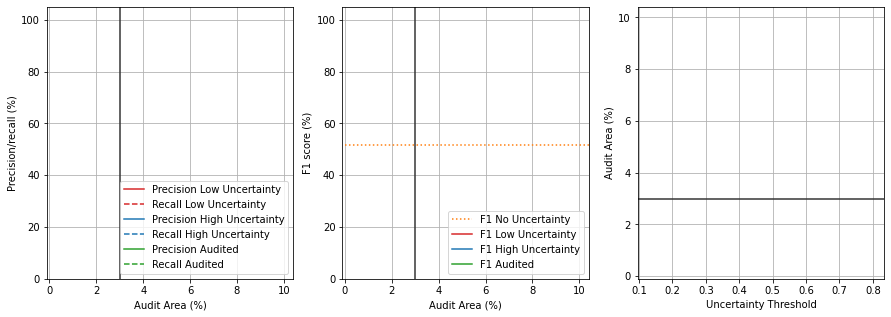

In [107]:
trainer.plotUncertaintyAA()

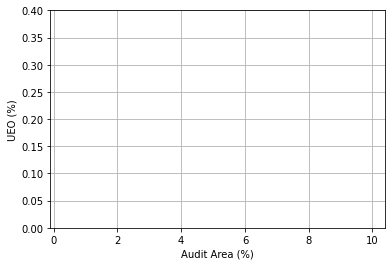

In [108]:
trainer.plotUEO()

In [109]:
trainer.getOptimalUncertaintyThreshold()

ic| bounds: (0.0015, 0.9985)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.38232011321635484
threshold 0.38232011321635484
(42639207,) (42639207,)


ic| label_current_deforestation_test_classified_incorrect.shape: (11494872,)
    predicted_test_classified_incorrect.shape: (11494872,)


cm_correct [[42109413   304374]
 [    9506   215914]]


ic| TP_H + FN_H + FP_H + TN_H: 11494872
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 11494872
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[10577984   402837]
 [  226529   287522]]
[0.41498939 0.95782983 0.29198441 0.21234077 0.41648186 0.55932583
 0.05329657]
0.6176798867836452
threshold 0.6176798867836452
(45104944,) (45104944,)


ic| label_current_deforestation_test_classified_incorrect.shape: (9029135,)
    predicted_test_classified_incorrect.shape: (9029135,)


cm_correct [[44040837   591986]
 [   14797   457324]]


ic| TP_H + FN_H + FP_H + TN_H: 9029135
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 9029135
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[8646560  115225]
 [ 221238   46112]]
[0.43583307 0.96865846 0.61844751 0.16679207 0.28581169 0.17247803
 0.03491759]
0.7631402264327096
threshold 0.7631402264327096
(46104959,) (46104959,)


ic| label_current_deforestation_test_classified_incorrect.shape: (8029120,)
    predicted_test_classified_incorrect.shape: (8029120,)


cm_correct [[44870831   707211]
 [   23481   503436]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 8029120
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 8029120
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[7816566       0]
 [ 212554       0]]
[0.41584046 0.955437   0.6808056  0.14831914        nan 0.
 0.02426468]
0.8530396603509355
threshold 0.8530396603509355
(46834093,) (46834093,)


ic| label_current_deforestation_test_classified_incorrect.shape: (7299986,)
    predicted_test_classified_incorrect.shape: (7299986,)


cm_correct [[45567690   707211]
 [   55756   503436]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 7299986
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 7299986
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[7119707       0]
 [ 180279       0]]
[0.41584046 0.90029185 0.6808056  0.1348501         nan 0.
 0.02235893]
0.9086005660817742
threshold 0.9086005660817742
(47333710,) (47333710,)


ic| label_current_deforestation_test_classified_incorrect.shape: (6800369,)
    predicted_test_classified_incorrect.shape: (6800369,)


cm_correct [[46047788   707211]
 [   75275   503436]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 6800369
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 6800369
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[6639609       0]
 [ 160760       0]]
[0.41584046 0.86992644 0.6808056  0.12562085        nan 0.
 0.02120046]
0.9429390942691613
threshold 0.9429390942691613
(47670521,) (47670521,)


ic| label_current_deforestation_test_classified_incorrect.shape: (6463558,)
    predicted_test_classified_incorrect.shape: (6463558,)


cm_correct [[46372369   707211]
 [   87505   503436]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 6463558
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 6463558
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[6315028       0]
 [ 148530       0]]
[0.41584046 0.85192261 0.6808056  0.11939906        nan 0.
 0.02046354]
0.9641614718126129
threshold 0.9641614718126129
(47891716,) (47891716,)


ic| label_current_deforestation_test_classified_incorrect.shape: (6242363,)
    predicted_test_classified_incorrect.shape: (6242363,)


cm_correct [[46585907   707211]
 [   95162   503436]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 6242363
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 6242363
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[6101490       0]
 [ 140873       0]]
[0.41584046 0.8410252  0.6808056  0.115313          nan 0.
 0.01999692]
0.9772776224565485
threshold 0.9772776224565485
(48032068,) (48032068,)


ic| label_current_deforestation_test_classified_incorrect.shape: (6102011,)
    predicted_test_classified_incorrect.shape: (6102011,)


cm_correct [[46721695   707211]
 [   99726   503436]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 6102011
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 6102011
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[5965702       0]
 [ 136309       0]]
[0.41584046 0.83466133 0.6808056  0.11272033        nan 0.
 0.01972934]
0.9853838493560645
threshold 0.9853838493560645
(48121131,) (48121131,)


ic| label_current_deforestation_test_classified_incorrect.shape: (6012948,)
    predicted_test_classified_incorrect.shape: (6012948,)


cm_correct [[46807905   707211]
 [  102579   503436]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 6012948
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 6012948
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[5879492       0]
 [ 133456       0]]
[0.41584046 0.83073191 0.6808056  0.1110751         nan 0.
 0.01956048]
0.990393773100484
threshold 0.990393773100484
(48177153,) (48177153,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5956926,)
    predicted_test_classified_incorrect.shape: (5956926,)


cm_correct [[46862275   707211]
 [  104231   503436]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 5956926
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 5956926
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[5825122       0]
 [ 131804       0]]
[0.41584046 0.82847349 0.6808056  0.11004022        nan 0.
 0.01947353]
0.9934900762555805
threshold 0.9934900762555805
(48212181,) (48212181,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5921898,)
    predicted_test_classified_incorrect.shape: (5921898,)


cm_correct [[46896197   707211]
 [  105337   503436]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 5921898
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 5921898
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[5791200       0]
 [ 130698       0]]
[0.41584046 0.82696834 0.6808056  0.10939316        nan 0.
 0.01940739]
0.9954036968449036
threshold 0.9954036968449036
(48234005,) (48234005,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5900074,)
    predicted_test_classified_incorrect.shape: (5900074,)


cm_correct [[46917359   707211]
 [  105999   503436]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 5900074
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 5900074
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[5770038       0]
 [ 130036       0]]
[0.41584046 0.82607005 0.6808056  0.10899001        nan 0.
 0.01936995]
0.996586379410677
threshold 0.996586379410677
(48247587,) (48247587,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5886492,)
    predicted_test_classified_incorrect.shape: (5886492,)


cm_correct [[46930558   707211]
 [  106382   503436]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 5886492
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 5886492
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[5756839       0]
 [ 129653       0]]
[0.41584046 0.82555123 0.6808056  0.10873912        nan 0.
 0.01935095]
0.9973173174342268
threshold 0.9973173174342268
(48255858,) (48255858,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5878221,)
    predicted_test_classified_incorrect.shape: (5878221,)


cm_correct [[46938589   707211]
 [  106622   503436]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 5878221
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 5878221
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[5748808       0]
 [ 129413       0]]
[0.41584046 0.82522645 0.6808056  0.10858633        nan 0.
 0.01933831]
0.9977690619764502
threshold 0.9977690619764502
(48261239,) (48261239,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5872840,)
    predicted_test_classified_incorrect.shape: (5872840,)


cm_correct [[46943792   707211]
 [  106800   503436]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 5872840
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 5872840
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[5743605       0]
 [ 129235       0]]
[0.41584046 0.82498574 0.6808056  0.10848693        nan 0.
 0.01932674]
0.9980482554577765
threshold 0.9980482554577765
(48264468,) (48264468,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5869611,)
    predicted_test_classified_incorrect.shape: (5869611,)


cm_correct [[46946909   707211]
 [  106912   503436]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 5869611
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 5869611
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[5740488       0]
 [ 129123       0]]
[0.41584046 0.82483436 0.6808056  0.10842728        nan 0.
 0.01931899]
0.9982208065186736
threshold 0.9982208065186736
(48266424,) (48266424,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5867655,)
    predicted_test_classified_incorrect.shape: (5867655,)


cm_correct [[46948806   707211]
 [  106971   503436]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 5867655
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 5867655
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[5738591       0]
 [ 129064       0]]
[0.41584046 0.82475463 0.6808056  0.10839115        nan 0.
 0.01931565]
0.9983274489391029
threshold 0.9983274489391029
(48267609,) (48267609,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5866470,)
    predicted_test_classified_incorrect.shape: (5866470,)


cm_correct [[46949957   707211]
 [  107005   503436]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 5866470
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 5866470
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[5737440       0]
 [ 129030       0]]
[0.41584046 0.82470869 0.6808056  0.10836926        nan 0.
 0.01931388]
0.9983933575795707
threshold 0.9983933575795707
(48268428,) (48268428,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5865651,)
    predicted_test_classified_incorrect.shape: (5865651,)


cm_correct [[46950751   707211]
 [  107030   503436]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 5865651
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 5865651
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[5736646       0]
 [ 129005       0]]
[0.41584046 0.82467492 0.6808056  0.10835413        nan 0.
 0.01931244]
0.9984340913595322
threshold 0.9984340913595322
(48268897,) (48268897,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5865182,)
    predicted_test_classified_incorrect.shape: (5865182,)


cm_correct [[46951209   707211]
 [  107041   503436]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 5865182
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 5865182
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[5736188       0]
 [ 128994       0]]


ic| self.threshold_optimal: 0.9984340913595322


[0.41584046 0.82466006 0.6808056  0.10834547        nan 0.
 0.01931212]


In [110]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.9984340913595322
(48268897,) (48268897,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5865182,)
    predicted_test_classified_incorrect.shape: (5865182,)


cm_correct [[46951209   707211]
 [  107041   503436]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 5865182
    len(label_mask_current_deforestation_test): 54134079
ic| TP_H + FN_H + FP_H + TN_H: 5865182
    len(label_mask_current_deforestation_test): 54134079


cm_incorrect [[5736188       0]
 [ 128994       0]]
[0.41584046 0.82466006 0.6808056  0.10834547        nan 0.
 0.01931212]
threshold 0.9984340913595322
(54134079,) (54134079,)


ic| self.m_optimal: {'AA': array([0.10834547]),
                     'UEO': array([0.01931212]),
                     'f1': 51.63,
                     'f1_H': array([nan]),
                     'f1_L': array([0.55288492]),
                     'precision_H': array([nan]),
                     'precision_L': array([0.41584046]),
                     'recall_H': array([0.]),
                     'recall_L': array([0.82466006]),
                     'recall_Ltotal': array([0.6808056])}
ic| self.m_audited_optimal: {'f1': array([0.60836549]),
                             'precision': array([0.47208916]),
                             'recall': array([0.85524652])}


cm_audited [[52687397   707211]
 [  107041   632430]]
[0.47208916 0.85524652]


{'metrics': {'precision_L': array([0.41584046]),
  'recall_L': array([0.82466006]),
  'recall_Ltotal': array([0.6808056]),
  'AA': array([0.10834547]),
  'precision_H': array([nan]),
  'recall_H': array([0.]),
  'UEO': array([0.01931212]),
  'f1_L': array([0.55288492]),
  'f1_H': array([nan]),
  'f1': 51.63},
 'metrics_audited': {'precision': array([0.47208916]),
  'recall': array([0.85524652]),
  'f1': array([0.60836549])},
 'exp': 193}